In [6]:
# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, split
import json

import os, sys
par_dir = split(os.getcwd())[0]
print(par_dir)
if par_dir not in sys.path:
    sys.path.append(par_dir)
from models.base_models.rs_base import get_architecture
from models.rs_model import Smooth
from visualizations.compare_grad_helper import load_model, ConvNextTforCIFAR
from visualizations.certified_radius_helper import (
    run_evals, process_results, get_lipschitz_radii, get_rs_radii)

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)

# Reproducibility
import random
random.seed(20221105)  # 20220304
torch.manual_seed(20221105)
np.random.seed(20221105)

/Users/Michael/GitRepos/AdaptiveSmoothingCode/experiments
device: cpu


In [3]:
def run_experiments(root_dir, std_path, adv_path, sigma, N, alpha, 
                    batch_size=2, img_per_class=1000, num_skip=1):
    rs_checkpoint = torch.load(adv_path)
    rs_base_classifier = get_architecture(rs_checkpoint["arch"], "cifar10")
    rs_base_classifier.load_state_dict(rs_checkpoint['state_dict'])
    adv_model = Smooth(rs_base_classifier, sigma, N, alpha)
    
    std_model = ConvNextTforCIFAR()
    std_model = load_model(std_model, std_path)

    pgd_type = 'l_2'
    comp_model_setting = {"use_gradnorm_std": False, "use_gradnorm_adv": False,
                          "accelerate": True, "use_sm": True, "use_log": False, 
                          "attack_type": pgd_type}

    batch_size = {"Train": batch_size, "Test": batch_size}
    alpha_setting = {"min": 0., "max": 1, "num": 5}
    save_dir = join(root_dir, "Results", "RandomizedSmoothing", f"{sigma:.2f}")
    print(save_dir)

    # Run experiments
    return run_evals(std_model, adv_model, comp_model_setting, alpha_setting, 
                     batch_size, img_per_class, num_skip, save_dir)

# Experiments

### $\sigma = 1$

In [4]:
root_dir = "/home/ybai/project/Adaptive-Smoothing"
# std_path = join(root_dir, "Pretrained/Base/ConvNeXT_CIFAR10.pt")
# adv_path = f"/Users/Michael/GitRepos/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"
std_path = "/home/ybai/project/Adaptive-Smoothing/models/ConvNeXT_CIFAR10.pt"

sigma, N, alpha = 1., 10000, 1  # Don't use abstain
# sigma, N, alpha = 0, 1, 1  # For evaluating unsmoothed model
adv_path = f"/home/ybai/project/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"

return_dic = run_experiments(root_dir, std_path, adv_path, sigma, N, alpha, batch_size=3)

/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/1.00
Files already downloaded and verified
Number of test images: 10000.
Files already downloaded and verified


/home/ybai/project/Adaptive-Smoothing/experiments/certified_radius_helper.py:98: RuntimeWarning: divide by zero encountered in divide
  alphas = list(real_alphas / (1 - real_alphas))


Evaluating the adaptively smoothed model.


100%|██████████| 3334/3334 [2:43:39<00:00,  2.95s/it]  


Lipschitz constant for h_i: 0.7978845608028654


/home/ybai/project/Adaptive-Smoothing/experiments/certified_radius_helper.py:167: RuntimeWarning: invalid value encountered in divide
  real_alphas = alphas / (1 + alphas)
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


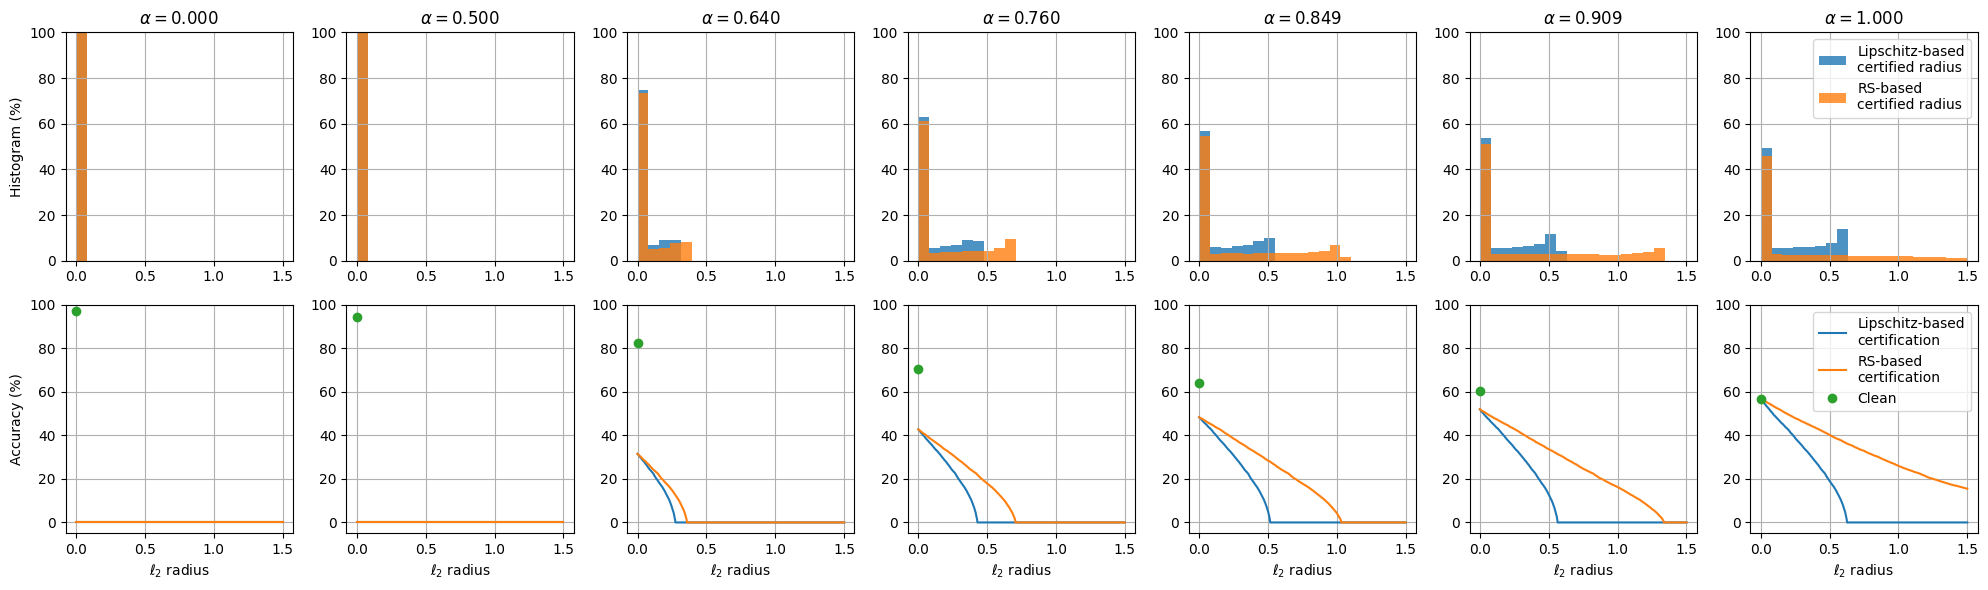

In [3]:
json_path = "/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/1.00_20230201040723/results.json"
process_results(json_path, max_x=1.5)

### $\alpha = 0.5$

In [14]:
std_model = ConvNextTforCIFAR()
root_dir = "/home/ybai/project/Adaptive-Smoothing"
# std_path = join(root_dir, "Pretrained/Base/ConvNeXT_CIFAR10.pt")
# adv_path = f"/Users/Michael/GitRepos/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"
std_path = "/home/ybai/project/Adaptive-Smoothing/models/ConvNeXT_CIFAR10.pt"

sigma, N, alpha = .5, 10000, 1  # Don't use abstain
# sigma, N, alpha = 0, 1, 1  # For evaluating unsmoothed model
adv_path = f"/home/ybai/project/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"

return_dic = run_experiments(root_dir, std_path, adv_path, sigma, N, alpha, batch_size=3)

/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.50
Files already downloaded and verified
Number of test images: 10000.
Files already downloaded and verified
Evaluating the adaptively smoothed model.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3334/3334 [2:46:51<00:00,  3.00s/it]


Lipschitz constant for h_i: 1.5957691216057308


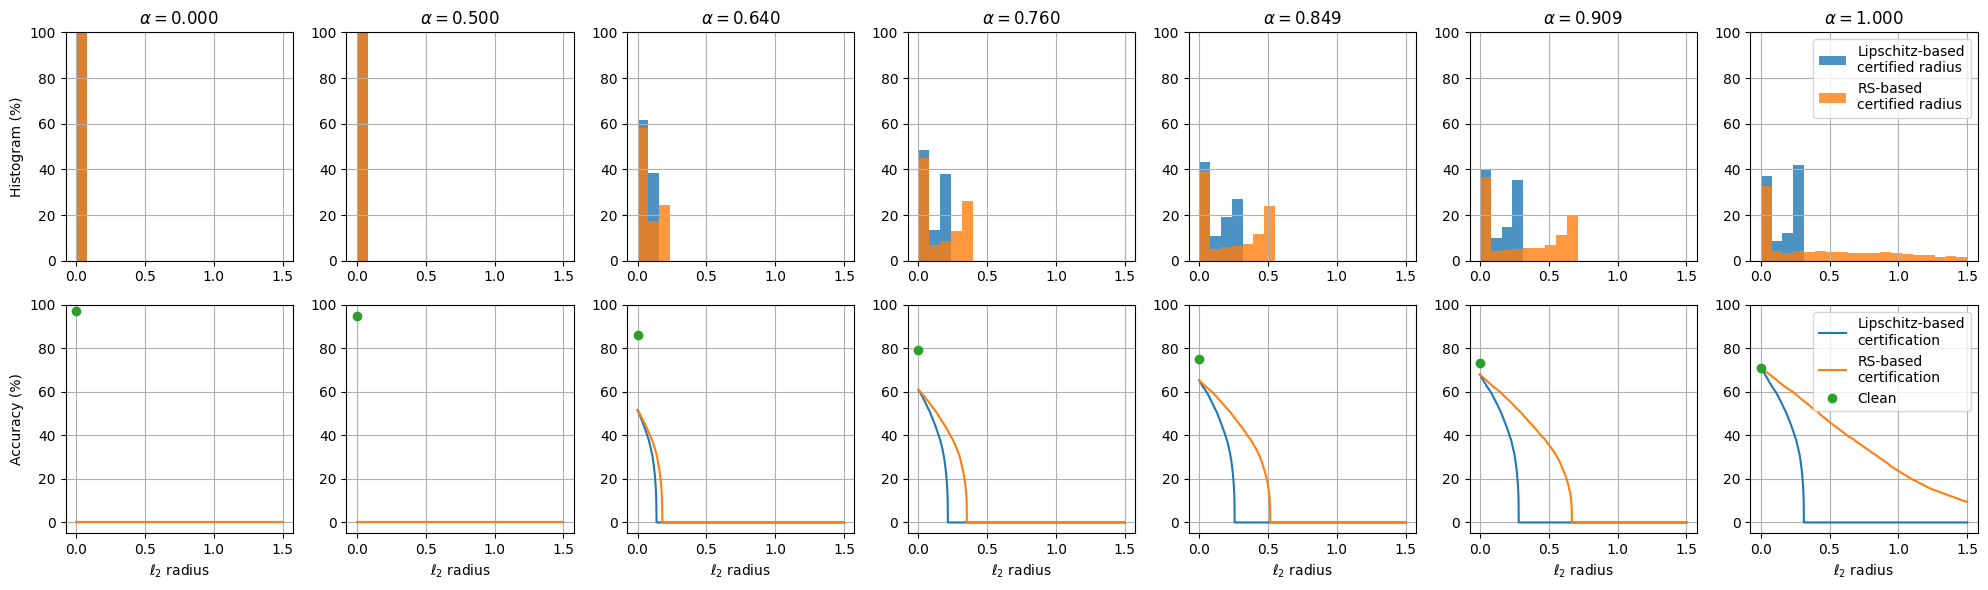

In [4]:
json_path = "/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.50_20230201083028/results.json"
process_results(json_path, max_x=1.5)

### $\alpha = 0.25$

In [15]:
std_model = ConvNextTforCIFAR()
root_dir = "/home/ybai/project/Adaptive-Smoothing"
# std_path = join(root_dir, "Pretrained/Base/ConvNeXT_CIFAR10.pt")
# adv_path = f"/Users/Michael/GitRepos/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"
std_path = "/home/ybai/project/Adaptive-Smoothing/models/ConvNeXT_CIFAR10.pt"

sigma, N, alpha = .25, 10000, 1  # Don't use abstain
# sigma, N, alpha = 0, 1, 1  # For evaluating unsmoothed model
adv_path = f"/home/ybai/project/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"

return_dic = run_experiments(root_dir, std_path, adv_path, sigma, N, alpha, batch_size=3)

/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.25
Files already downloaded and verified
Number of test images: 10000.
Files already downloaded and verified
Evaluating the adaptively smoothed model.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3334/3334 [2:46:46<00:00,  3.00s/it]


Lipschitz constant for h_i: 3.1915382432114616


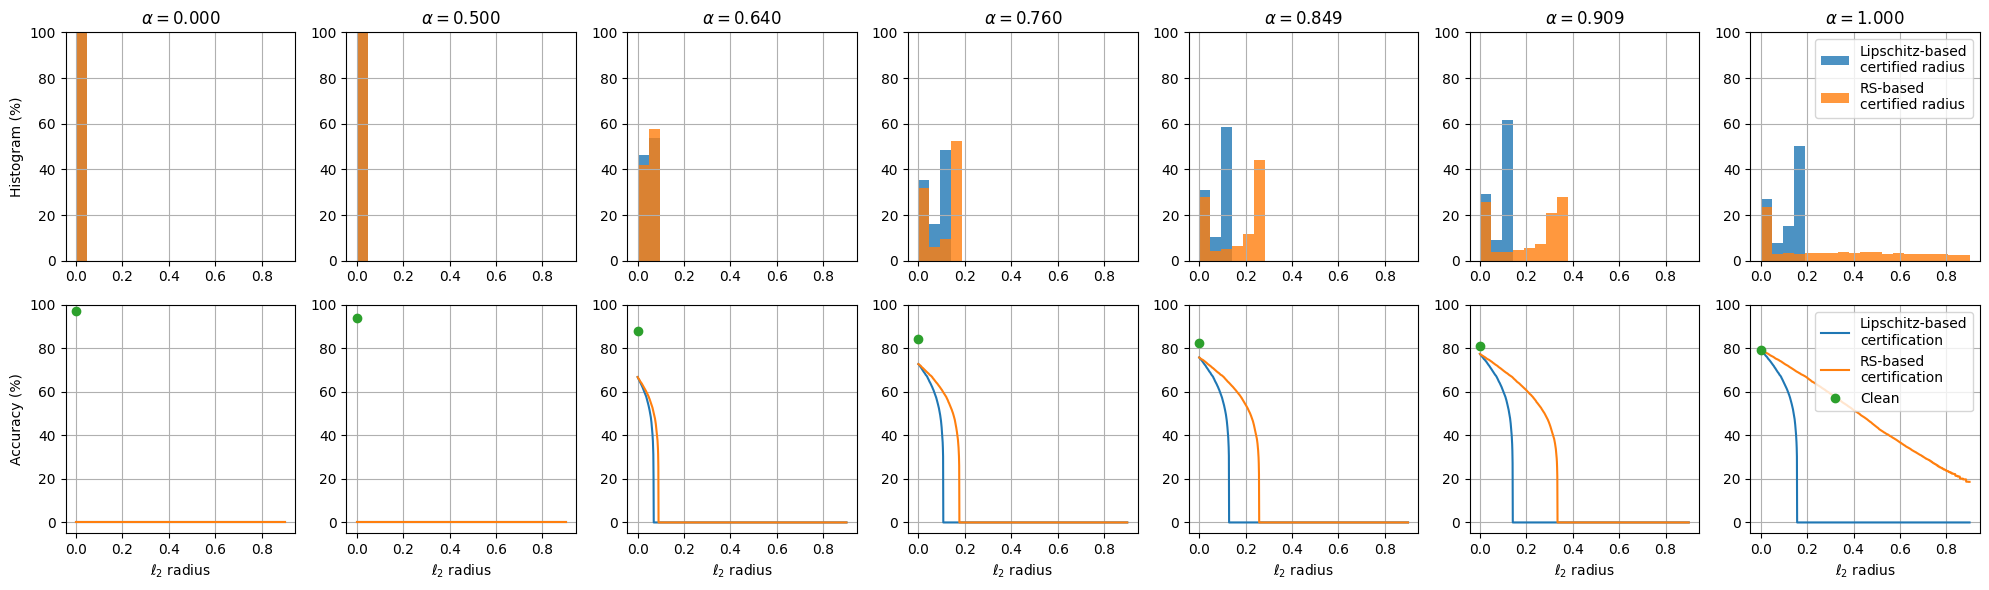

In [7]:
json_path = "/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.25_20230201111724/results.json"
process_results(json_path, max_x=.9)

### $\alpha = 0.12$

In [16]:
std_model = ConvNextTforCIFAR()
root_dir = "/home/ybai/project/Adaptive-Smoothing"
# std_path = join(root_dir, "Pretrained/Base/ConvNeXT_CIFAR10.pt")
# adv_path = f"/Users/Michael/GitRepos/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"
std_path = "/home/ybai/project/Adaptive-Smoothing/models/ConvNeXT_CIFAR10.pt"

sigma, N, alpha = .12, 10000, 1  # Don't use abstain
# sigma, N, alpha = 0, 1, 1  # For evaluating unsmoothed model
adv_path = f"/home/ybai/project/RandomizedSmoothing/models/cifar10/resnet110/noise_{sigma:.2f}/checkpoint.pth.tar"

return_dic = run_experiments(root_dir, std_path, adv_path, sigma, N, alpha, batch_size=3)

/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.12
Files already downloaded and verified
Number of test images: 10000.
Files already downloaded and verified
Evaluating the adaptively smoothed model.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3334/3334 [2:46:46<00:00,  3.00s/it]


Lipschitz constant for h_i: 6.649038006690545


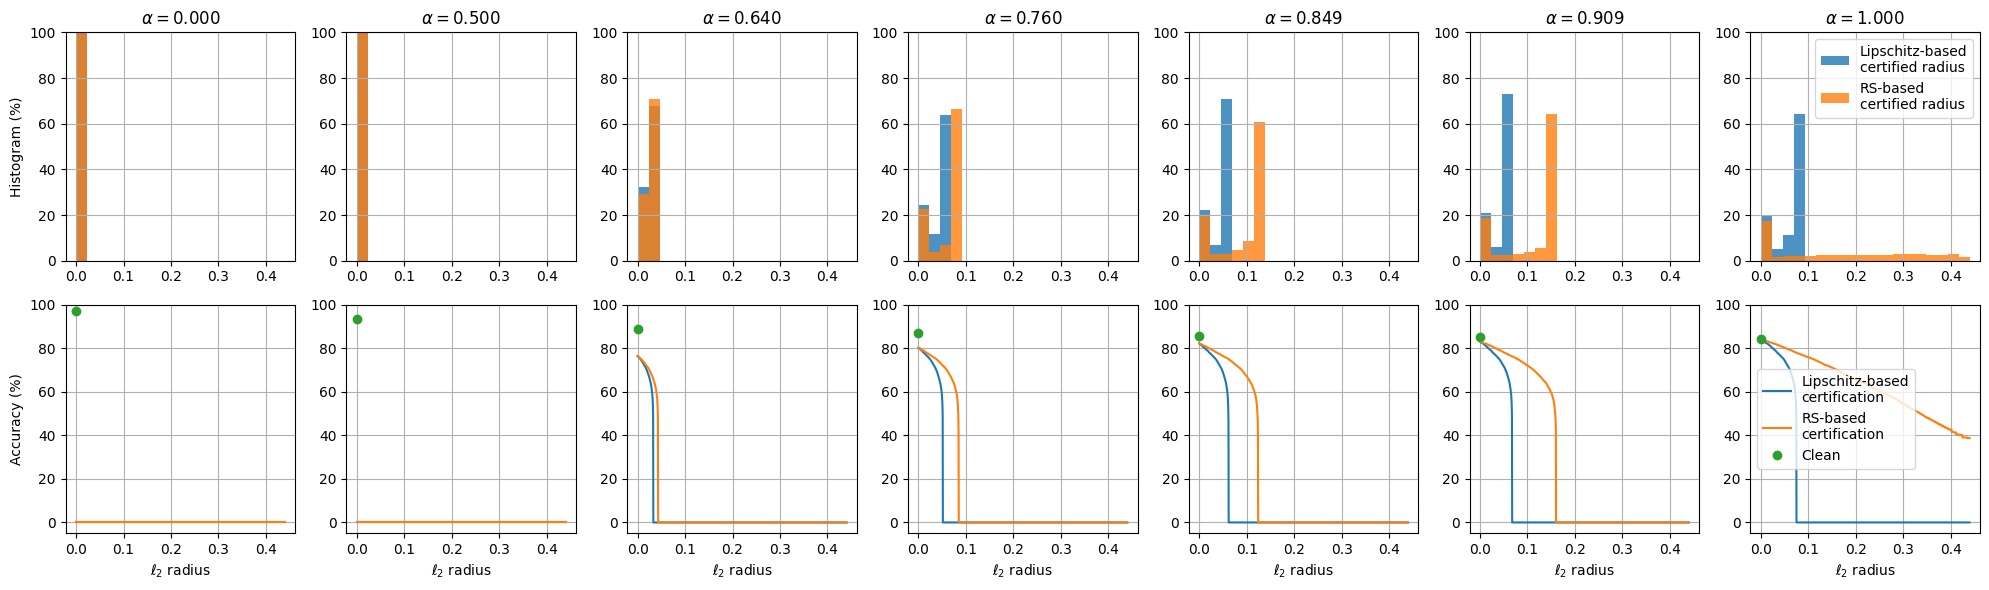

In [9]:
json_path = "/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing/0.12_20230201140415/results.json"
process_results(json_path, max_x=.44)

## Comparison

We consider two sets of comparisons:
- $\sigma = 1.0$, $\alpha = 0.76$ versus $\sigma = 0.5$, $\alpha = 1$. Clean accuracy $\approx 70\%$.
- $\sigma = 0.5$, $\alpha = 0.76$ versus $\sigma = 0.25$, $\alpha = 1$. Clean accuracy $\approx 70\%$.

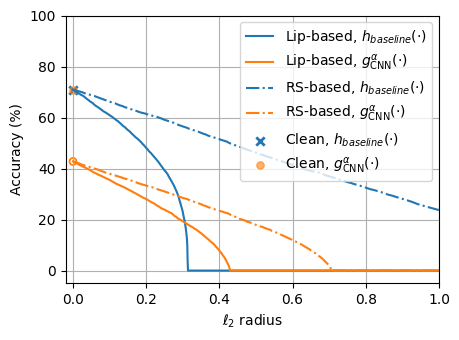

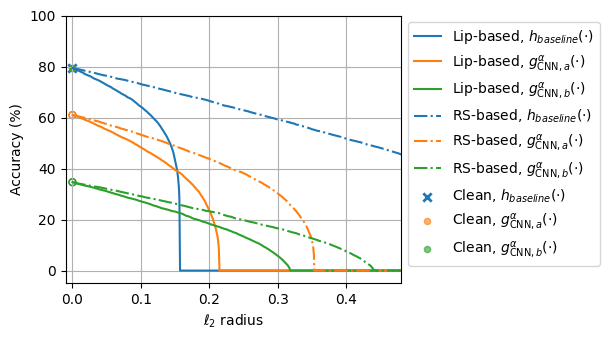

In [10]:
# root_dir = "/home/ybai/project/Adaptive-Smoothing/Results/RandomizedSmoothing"
root_dir = "/Users/Michael/GitRepos/AdaptiveSmoothingCode/Results/RandomizedSmoothing"
json_paths = {"1.00": join(root_dir, "1.00_20230203023413/results.json"),
              # "1.00": join(root_dir, "1.00_20230201040723/results.json"),
              "0.50": join(root_dir, "0.50_20230201083028/results.json"),
              "0.25": join(root_dir, "0.25_20230201111724/results.json")}
data_dic, comp_acc = {}, {}
robust_radii = {"Lip": {}, "RS": {}}
# rs_string, ada_string = r"$h_{baseline} (\cdot)$", r"$h^\alpha (\cdot)$"
# ada_string_1, ada_string_2 = r"$g^\alpha_a (\cdot)$", r"$h^\alpha_b (\cdot)$"
rs_string, ada_string = r"$h_{baseline} (\cdot)$", r"$g^\alpha_{\mathrm{CNN}} (\cdot)$"
ada_string_1, ada_string_2 = r"$g^\alpha_{\mathrm{CNN}, a} (\cdot)$", r"$g^\alpha_{\mathrm{CNN}, b} (\cdot)$"

# Initialize plots
fig0, ax0 = plt.subplots(1, 1, figsize=(4.7, 3.5))
thresh0 = np.linspace(0., 1., 1000)

for sig in json_paths.keys():
    with open(json_paths[sig], 'r') as f:
        data_dic[sig] = json.load(f)  # Load file

    # Calculate Lip constant
    sigma = float(json_paths[sig].split("_")[0][-4:])
    Lip_h = np.sqrt(2 / np.pi) / sigma

    # Load data
    comp_acc[sig] = data_dic[sig]["comp_acc"]
    all_res_h = np.asarray(data_dic[sig]["all_res"]['inf'])
    all_labels = np.asarray(data_dic[sig]["all_labels"])
    
    correct_mask_h = all_res_h.argmax(axis=1) == all_labels
    top_2 = torch.tensor(all_res_h).topk(2, dim=1).values
    max_diff = top_2[:, 0] - top_2[:, 1]  # This is needed for the Lip-based radii

    robust_radii["Lip"][sig], robust_radii["RS"][sig] = {}, {}
    for real_alpha in [.67, .76, 1]:
        robust_radii["Lip"][sig][f"{real_alpha:.2f}"] = get_lipschitz_radii(
            max_diff, real_alpha, Lip_h, correct_mask_h)
        robust_radii["RS"][sig][f"{real_alpha:.2f}"] = get_rs_radii(
            top_2, real_alpha, sigma, correct_mask_h)

for typ, sty in zip(["Lip", "RS"], ["-", "-."]):
    # Plot the certified accuracy versus r
    rob_tab = robust_radii[typ]["0.50"][f"{1:.2f}"].reshape(-1, 1) > thresh0.reshape(1, 1000)
    ax0.plot(thresh0, rob_tab.mean(axis=0) * 100, sty, color="C0", label=f"{typ}-based, "+rs_string)
    rob_tab = robust_radii[typ]["1.00"][f"{.76:.2f}"].reshape(-1, 1) > thresh0.reshape(1, 1000)
    ax0.plot(thresh0, rob_tab.mean(axis=0) * 100, sty, color="C1", label=f"{typ}-based, "+ada_string)
    ax0.scatter(0, rob_tab[:, 1].mean() * 100, 
                marker='o', label=None, facecolors="None", edgecolors="C1", linewidth=1, s=25)

# Clean accuracy
ax0.scatter(0, list(comp_acc["0.50"].values())[-1] * 100, 
            marker='x', color="C0", label="Clean, "+rs_string, linewidth=2)
ax0.scatter(0, list(comp_acc["1.00"].values())[-2] * 100, 
            marker='o', color="C1", label="Clean, "+ada_string, s=28, alpha=.6)

# Formatting for the curves
ax0.set_xlim([-.02, 1.]), ax0.set_ylim([-5., 100.])
ax0.set_xlabel(r"$\ell_2$ radius")
ax0.grid(), ax0.legend()
ax0.set_ylabel("Accuracy (%)")
plt.tight_layout()
plt.savefig(join(split(root_dir)[0], "CompareCert_0_.pdf"))

fig1, ax1 = plt.subplots(1, 1, figsize=(6.2, 3.5))
thresh1 = np.linspace(0., .48, 1000)

# Plot the certified accuracy versus r
for typ, sty in zip(["Lip", "RS"], ["-", "-."]):
    rob_tab_rs = robust_radii[typ]["0.25"][f"{1:.2f}"].reshape(-1, 1) > thresh1.reshape(1, 1000)
    ax1.plot(thresh1, rob_tab_rs.mean(axis=0) * 100, sty, color="C0", label=f"{typ}-based, "+rs_string)

    rob_tab_ada_1 = robust_radii[typ]["0.50"][f"{.76:.2f}"].reshape(-1, 1) > thresh1.reshape(1, 1000)
    ax1.plot(thresh1, rob_tab_ada_1.mean(axis=0) * 100, sty, color="C1", label=f"{typ}-based, "+ada_string_1)
    ax1.scatter(0, rob_tab_ada_1[:, 1].mean() * 100, 
                marker='o', label=None, facecolors="None", edgecolors="C1", linewidth=1, s=25)

    rob_tab_ada_2 = robust_radii[typ]["1.00"][f"{.67:.2f}"].reshape(-1, 1) > thresh1.reshape(1, 1000)
    ax1.plot(thresh1, rob_tab_ada_2.mean(axis=0) * 100, sty, color="C2", label=f"{typ}-based, "+ada_string_2)
    ax1.scatter(0, rob_tab_ada_2[:, 1].mean() * 100, 
                marker='o', label=None, facecolors="None", edgecolors="C2", linewidth=1, s=25)

ax1.scatter(0, list(comp_acc["0.25"].values())[-1] * 100, 
            marker='x', color="C0", label="Clean, "+rs_string, linewidth=2)
ax1.scatter(0, list(comp_acc["0.50"].values())[-4] * 100, 
            marker='o', color="C1", label="Clean, "+ada_string_1, s=20, alpha=.6)
ax1.scatter(0, list(comp_acc["1.00"].values())[-3] * 100, 
            marker='o', color="C2", label="Clean, "+ada_string_2, s=20, alpha=.6)

# Formatting for the curves
ax1.set_xlim([-.01, .48]), ax1.set_ylim([-5., 100.])
ax1.set_xlabel(r"$\ell_2$ radius")
ax1.grid(), ax1.legend(bbox_to_anchor=(1, 1))
ax1.set_ylabel("Accuracy (%)")
plt.tight_layout()
plt.savefig(join(split(root_dir)[0], "CompareCert_1_.pdf"))